In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from collections import Counter
import joblib
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from pathlib import Path,PureWindowsPath
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [46]:
train_data_path=Path("../Dataset/train.csv")
test_data_path=Path("../Dataset/test.csv")
df=pd.read_csv(train_data_path)

In [47]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [49]:
df.shape

(2000, 21)

In [50]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [52]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [53]:
df.duplicated().sum()

0

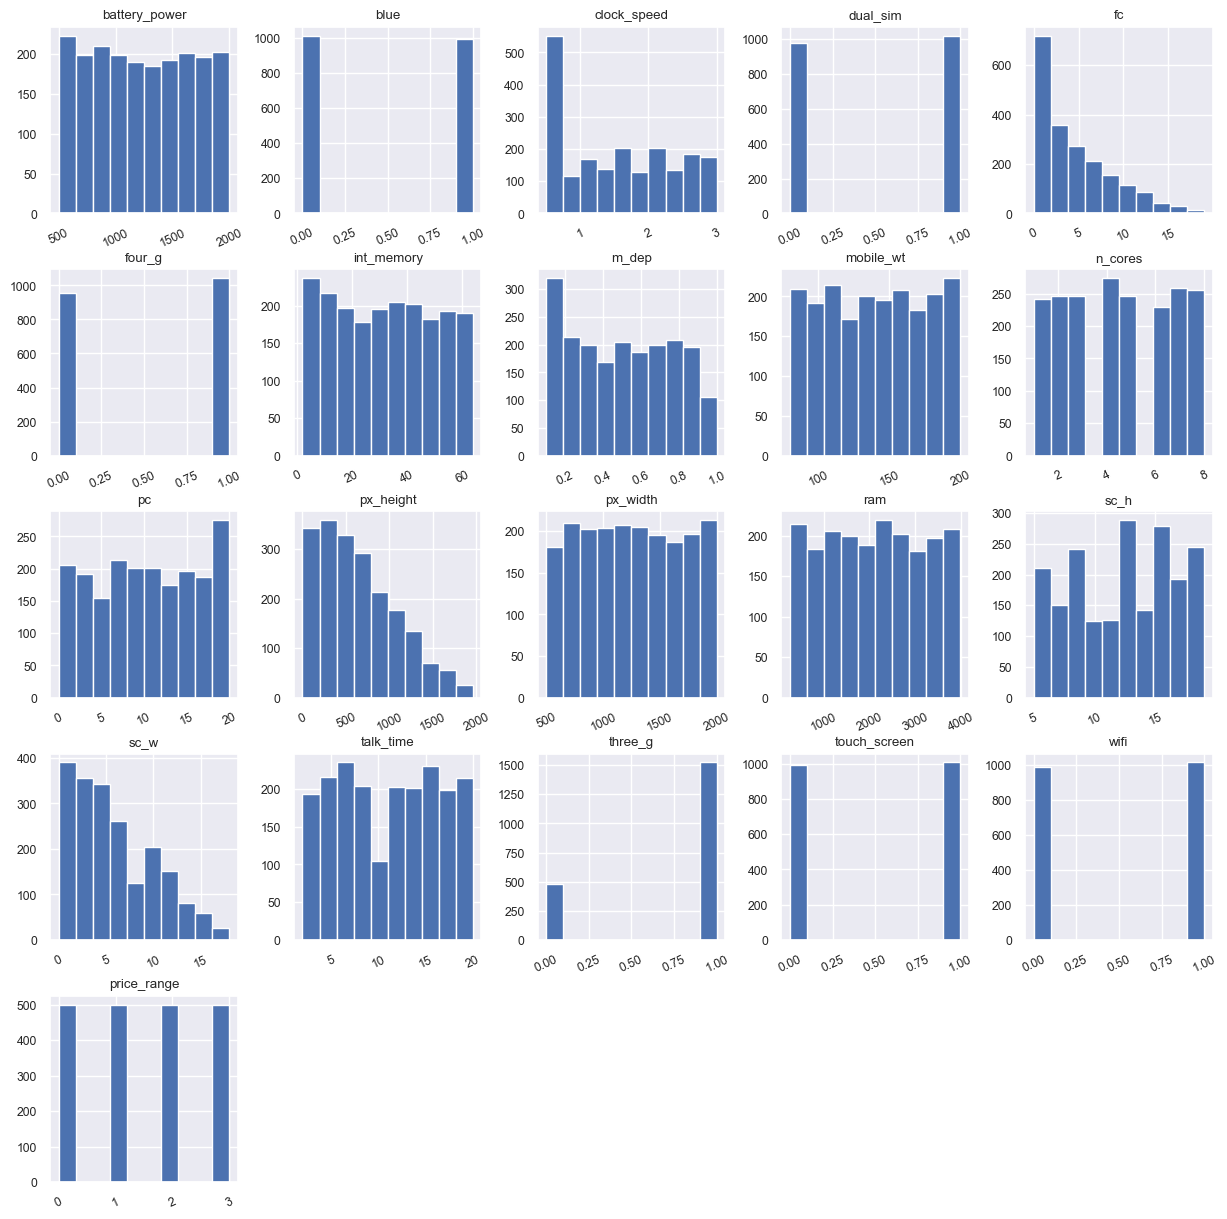

<Figure size 640x480 with 0 Axes>

In [54]:
df.hist(figsize=(15,15), xrot=25)
plt.show()
plt.tight_layout()

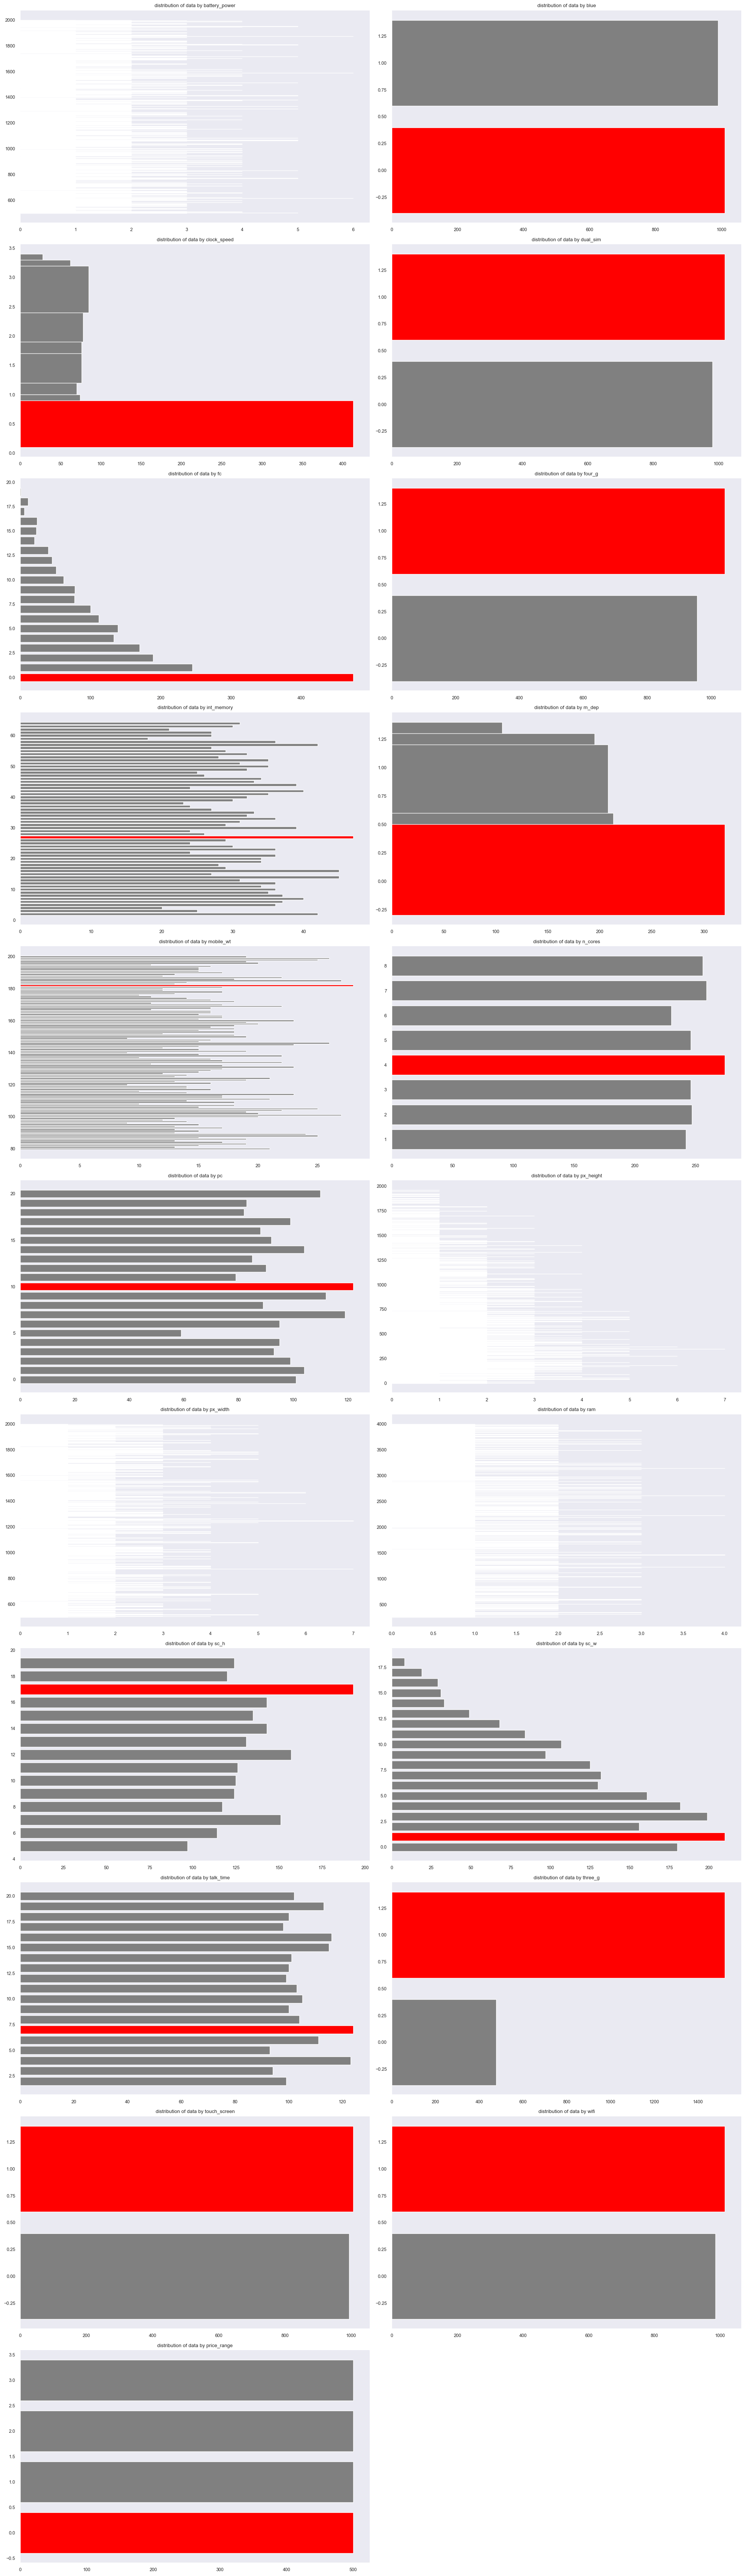

In [55]:
plt.figure(figsize=(20,100))
plot_number =1
for col in df.columns:
    df5=df.groupby(col).size()
    df5 =df5.sort_values()
    ax=plt.subplot(16,2,plot_number)
    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    plt.grid(visible=False)
    plt.title('distribution of data by '+ col )
    indexlist = df5.index.tolist()
    ix =indexlist.index(df5.idxmax())
    colors =["red" if i==ix else "grey" for i in range(df5.shape[0])]
    plt.barh(df5.index,df5,color=colors)
#     for i,v in enumerate(df5):
#         plt.text(v,i-0.05,str(v),color="Black",fontweight='bold')
    plot_number+=1
plt.tight_layout()
plt.show()

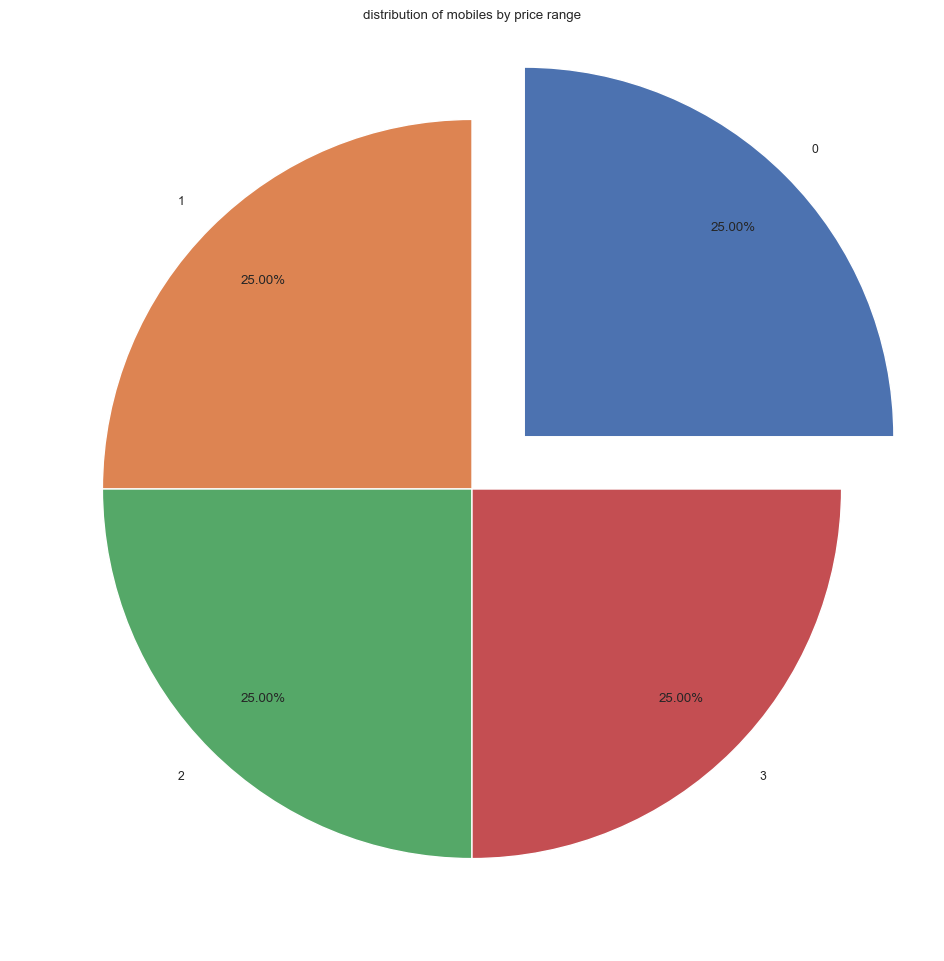

In [56]:
df2=df.groupby(['price_range']).size()
fig= plt.figure(figsize=(12,12))
plt.title("distribution of mobiles by price range")
myexplode = [0.2, 0, 0,0]
plt.pie(df2,labels=list(df2.index),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=False,
        explode=myexplode)
plt.show()

In [57]:
X = df.drop('price_range', axis=1)
y = df['price_range']

<AxesSubplot:>

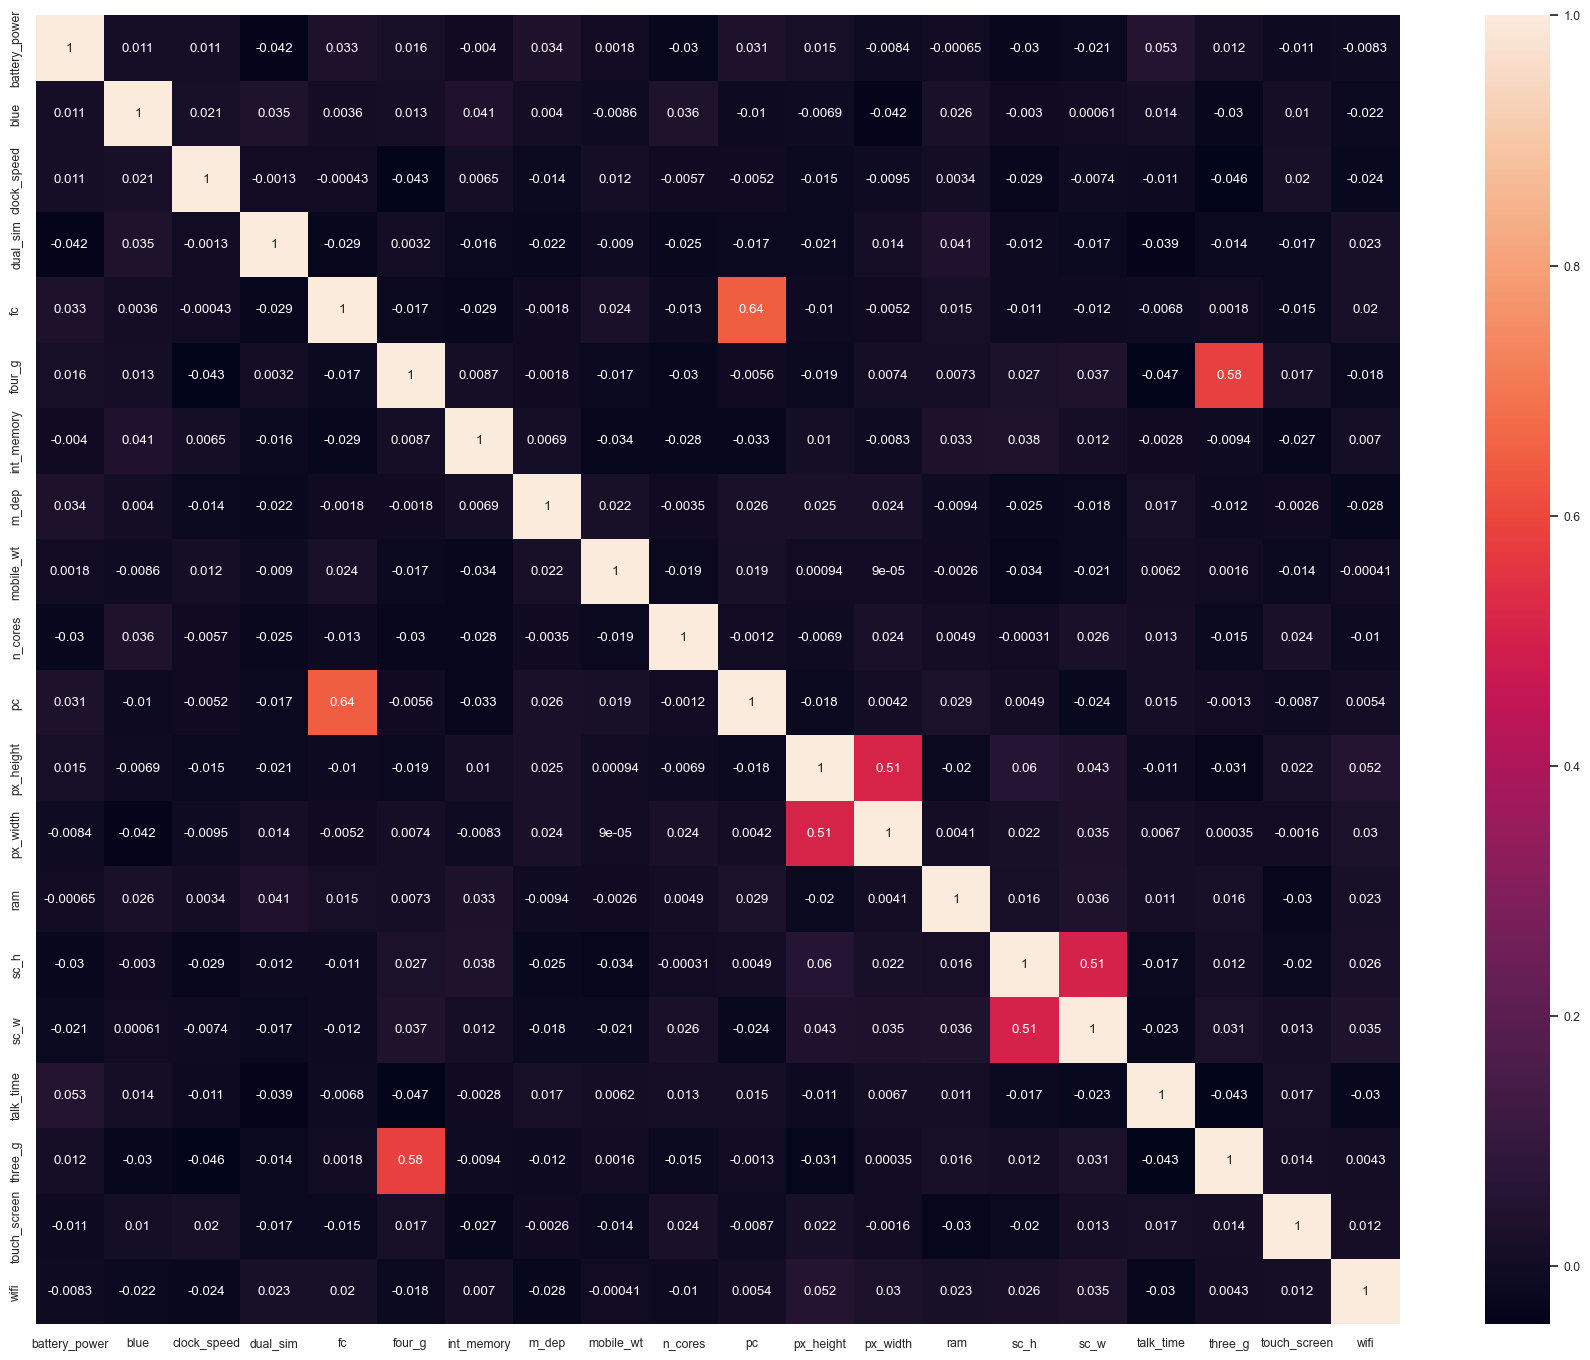

In [58]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(X.corr(), annot=True)

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=32,shuffle=True)

In [60]:
def calc_class_percentage(y_train):
    counter = Counter(y_train)
    print("=============================")
    for k,v in counter.items():
        per = 100*v/len(y_train)
        print(f"Class= {k}, n={v} ({per:.2f}%)")

In [61]:
calc_class_percentage(y_train)
#smote = SMOTE()
# X_train,y_train=smote.fit_resample(X_train,y_train)
# calc_class_percentage(y_train)

Class= 1, n=407 (25.44%)
Class= 3, n=405 (25.31%)
Class= 0, n=394 (24.62%)
Class= 2, n=394 (24.62%)


In [62]:
# test_df=pd.read_csv("..\\Dataset\\test2.csv")
# test_df=test_df.drop('Unnamed: 0',axis=1)
# X_test = test_df.drop('price_range', axis=1)
# y_test = test_df['price_range']

In [63]:
def plot_confusion_perf(X_train,y_train,y_test,model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    Accuracy  =  accuracy_score(y_test, y_pred)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')
    print(f"Accuracy Score: {Accuracy}")
    print(f"Precision: {Precision}")
    print(f"Recall: {Recall}")
    print(f"F1_score: {F1_score}")
    return disp

**************************************************
LogisticRegression
**************************************************
Accuracy Score: 0.62
Precision: 0.6278007658102767
Recall: 0.62
F1_score: 0.6213747629922467


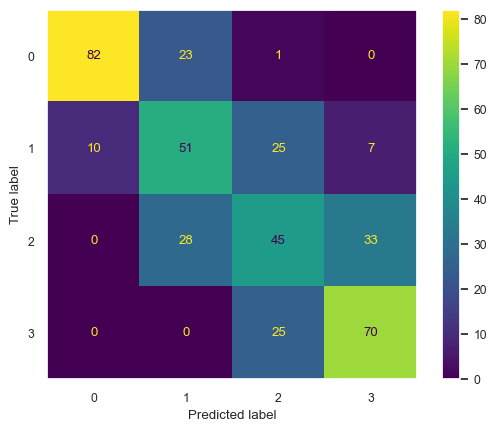

**************************************************
RandomForestClassifier
**************************************************
Accuracy Score: 0.8925
Precision: 0.8943086545611041
Recall: 0.8925
F1_score: 0.8931933401840856


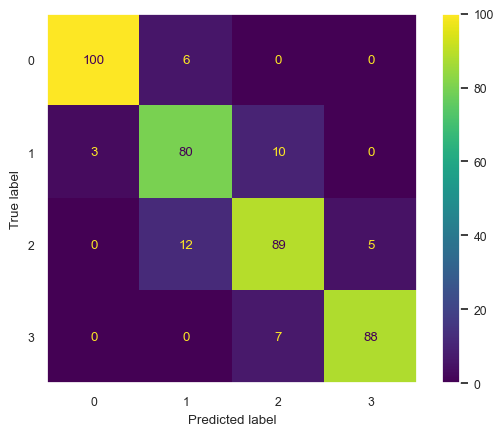

**************************************************
DecisionTreeClassifier
**************************************************
Accuracy Score: 0.8525
Precision: 0.8545616461646165
Recall: 0.8525
F1_score: 0.8528636379985862


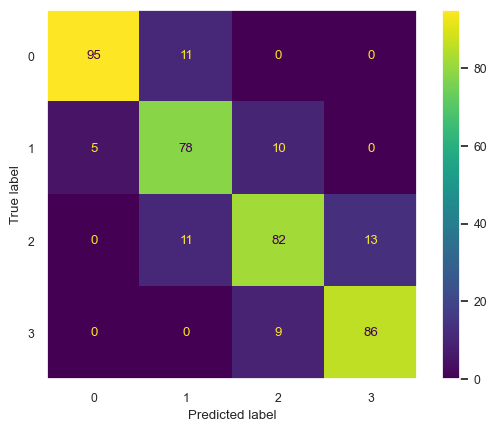

**************************************************
AdaBoostClassifier
**************************************************
Accuracy Score: 0.6525
Precision: 0.7712915826253035
Recall: 0.6525
F1_score: 0.6435246349522384


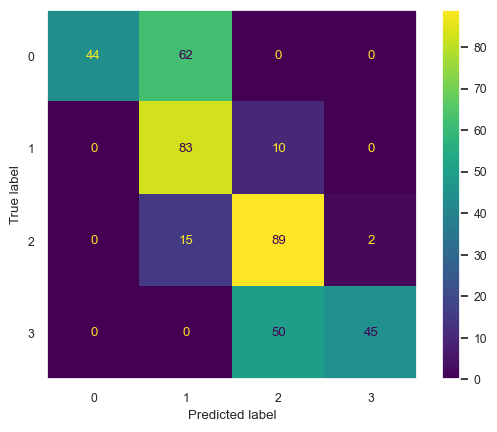

**************************************************
GradientBoostingClassifier
**************************************************
Accuracy Score: 0.915
Precision: 0.9161966954614013
Recall: 0.915
F1_score: 0.9152794184981684


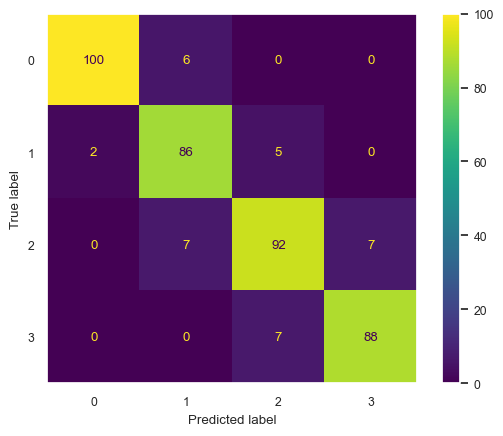

**************************************************
ExtraTreesClassifier
**************************************************
Accuracy Score: 0.8725
Precision: 0.8716267279165655
Recall: 0.8725
F1_score: 0.87191777440638


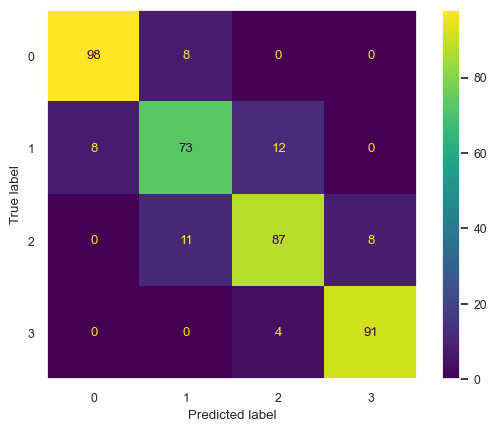

In [64]:
lr= LogisticRegression(random_state=0)
rf = RandomForestClassifier(n_estimators=200)
ab= AdaBoostClassifier(n_estimators=200)
gtb= GradientBoostingClassifier(n_estimators=200)
dtc=DecisionTreeClassifier(random_state=0)
etc=ExtraTreesClassifier(random_state=0)


models={"LogisticRegression":lr,"RandomForestClassifier":rf,"DecisionTreeClassifier":dtc,"AdaBoostClassifier":ab,"GradientBoostingClassifier":gtb,"ExtraTreesClassifier":etc}

for name,model in models.items():
        print(50*'*')
        print(f"{name}")
        print(50*'*')
        disp=plot_confusion_perf(X_train,y_train,y_test,model)
        disp.plot()
        plt.grid(False)
        plt.show()

In [65]:
# lr= LogisticRegression(random_state=0).fit(X_train,y_train)
# y_pred= lr.predict(X_test)
# disp =plot_confusion_perf(y_test,y_pred,lr)
# disp.plot()
# plt.grid(False)
# plt.show()

In [66]:
# rf = RandomForestClassifier(n_estimators=200)
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)
# disp=plot_confusion_perf(y_test,y_pred,rf)
# disp.plot()
# plt.grid(False)
# plt.show()

In [67]:
# ab= AdaBoostClassifier(n_estimators=200)
# ab.fit(X_train,y_train)
# y_pred =ab.predict(X_test)
# disp=plot_confusion_perf(y_test,y_pred,ab)
# disp.plot()
# plt.grid(False)
# plt.show()

In [68]:
# gtb= GradientBoostingClassifier(n_estimators=200)
# gtb.fit(X_train,y_train)
# y_pred =gtb.predict(X_test)
# disp=plot_confusion_perf(y_test,y_pred,gtb)
# disp.plot()
# plt.grid(False)
# plt.show()

In [69]:
# dtc=DecisionTreeClassifier(random_state=0)
# dtc.fit(X_train,y_train)
# y_pred=dtc.predict(X_test)
# disp=plot_confusion_perf(y_test,y_pred,dtc)
# disp.plot()
# plt.show()

In [70]:
# etc=ExtraTreesClassifier(random_state=0)
# etc.fit(X_train,y_train)
# y_pred= etc.predict(X_test)
# disp=plot_confusion_perf(y_test,y_pred,etc)
# disp.plot()
# plt.show()

In [71]:
gtb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [72]:
# gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

# # A parameter grid
# params = {
#     'n_estimators': range(100, 500, 100),
#     'ccp_alpha': [0.0, 0.1],
#     'criterion': ['friedman_mse', 'squared_error'],
#     'max_depth': [5,11],
#     'min_samples_split': [2,3],
#     'min_samples_leaf': [2,3],
    
# }

# gtb_estimator = GradientBoostingClassifier()

# gsearch = GridSearchCV(
#     estimator= gtb_estimator,
#     param_grid= params,
#     scoring='f1_weighted',
#     n_jobs=-1,
#     cv=gkf,
#     verbose=3,
# )

# gtb_model = gsearch.fit(X=X_train, y=y_train)

In [73]:
# gtb_model.best_score_

In [74]:
# gtb_model.best_params_

In [75]:
# gtb_model_tuned = GradientBoostingClassifier(ccp_alpha = 0.0,
#                                 criterion = 'squared_error',
#                                 min_samples_split = 3,
#                                 min_samples_leaf=2,
#                                 max_depth = 5,
#                                 n_estimators = 200)

# gtb_model_tuned.fit(X_train, y_train)
# y_pred_tuned = gtb_tuned.predict(X_test)
# disp=plot_confusion_perf(y_test,y_pred_tuned,gtb_model_tuned)
# disp.plot()
# plt.grid(False)
# plt.show()